# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

In [2]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Online Retail.xlsx',encoding = 'utf-8')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# find any missing values in the data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# remove any rows with missing values in the data
df = df.dropna(axis = 0, how = 'any')

In [7]:
# descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
def show_statistics(var_data):
    '''
    This function will make a basic statistics of data
    '''
    
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    # Measure of dispersion
    ran_val = max_val - min_val
    var_val = var_data.var()
    std_val = var_data.std()
    q1 = var_data.quantile(0.25)
    q3 = var_data.quantile(0.75)
    IQR = q3 - q1
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\nRange:{:.2f}\nVariance:{:.2f}\nStandard deviation:{:.2f}\nInterQuantile range:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val,
                                                                                            ran_val,
                                                                                            var_val,
                                                                                            std_val,
                                                                                            IQR))


In [9]:
show_statistics(df['Quantity'])

Minimum:-80995.00
Mean:12.06
Median:5.00
Mode:1.00
Maximum:80995.00
Range:161990.00
Variance:61848.39
Standard deviation:248.69
InterQuantile range:10.00



In [10]:
show_statistics(df['UnitPrice'])

Minimum:0.00
Mean:3.46
Median:1.95
Mode:1.25
Maximum:38970.00
Range:38970.00
Variance:4804.59
Standard deviation:69.32
InterQuantile range:2.50



In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
df['Year'] = df['InvoiceDate'].dt.year

In [13]:
df['Month'] = df['InvoiceDate'].dt.month_name()

df["Month"] = pd.Categorical(df["Month"],
                             categories=["January", "February", "March", "April", "May", "June", "July",
                                         "August", "September", "October", "November", "December"],
                             ordered=True)
df = df.sort_values(["Year", "Month"], ignore_index=True)

In [14]:
df['Weekday'] = df['InvoiceDate'].dt.day_name()

<AxesSubplot:xlabel='Year', ylabel='Count'>

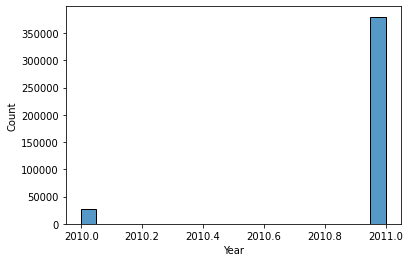

In [15]:
sns.histplot(data = df, x = 'Year')

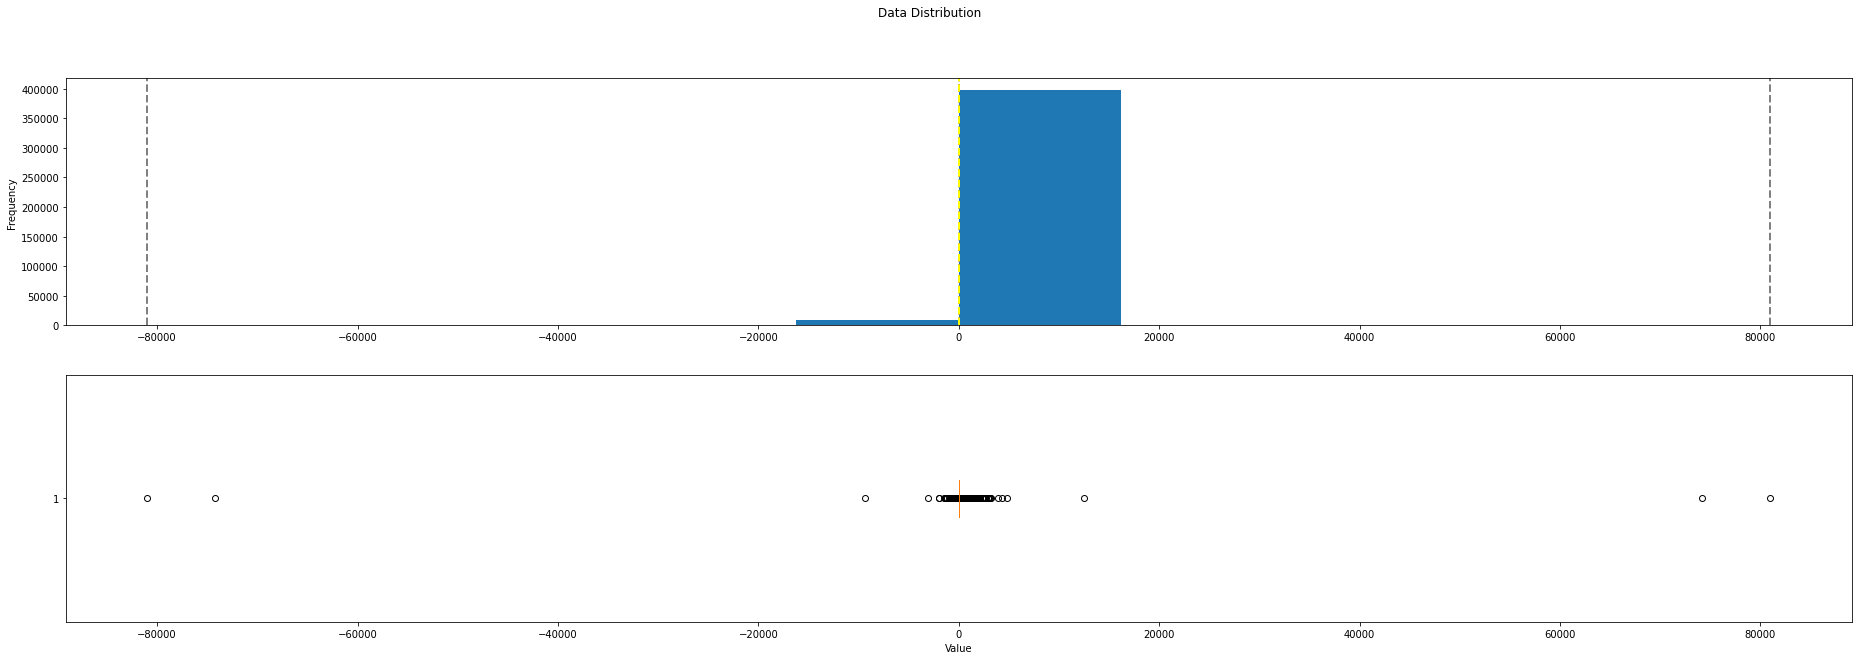

In [16]:
# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (32,10))

# Plot the histogram   
ax[0].hist(df['Quantity'])
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(x=df['Quantity'].min(), color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=df['Quantity'].mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=df['Quantity'].median(), color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=df['Quantity'].mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=df['Quantity'].max(), color = 'gray', linestyle='dashed', linewidth = 2)

# Plot the boxplot   
ax[1].boxplot(df['Quantity'], vert=False)
ax[1].set_xlabel('Value')
# Add a title to the Figure
fig.suptitle('Data Distribution')

# Show the figure
fig.show()

In [17]:
# consider only positive values for quantity variables since number of quantities cannot be negative 
df_1 = df[df['Quantity'] > 0]
df_1.describe()

,Quantity,UnitPrice,CustomerID,Year
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,2010.934259
std,180.420210,22.096788,1713.169877,0.247829
min,1.000000,0.000000,12346.000000,2010.000000
25%,2.000000,1.250000,13969.000000,2011.000000
50%,6.000000,1.950000,15159.000000,2011.000000
75%,12.000000,3.750000,16795.000000,2011.000000
max,80995.000000,8142.750000,18287.000000,2011.000000


<AxesSubplot:xlabel='Weekday', ylabel='Quantity'>

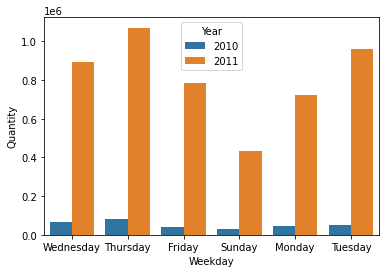

In [18]:
sns.barplot(x = df_1['Weekday'], y= df_1['Quantity'], hue = df_1['Year'], estimator = "sum", errorbar = None)

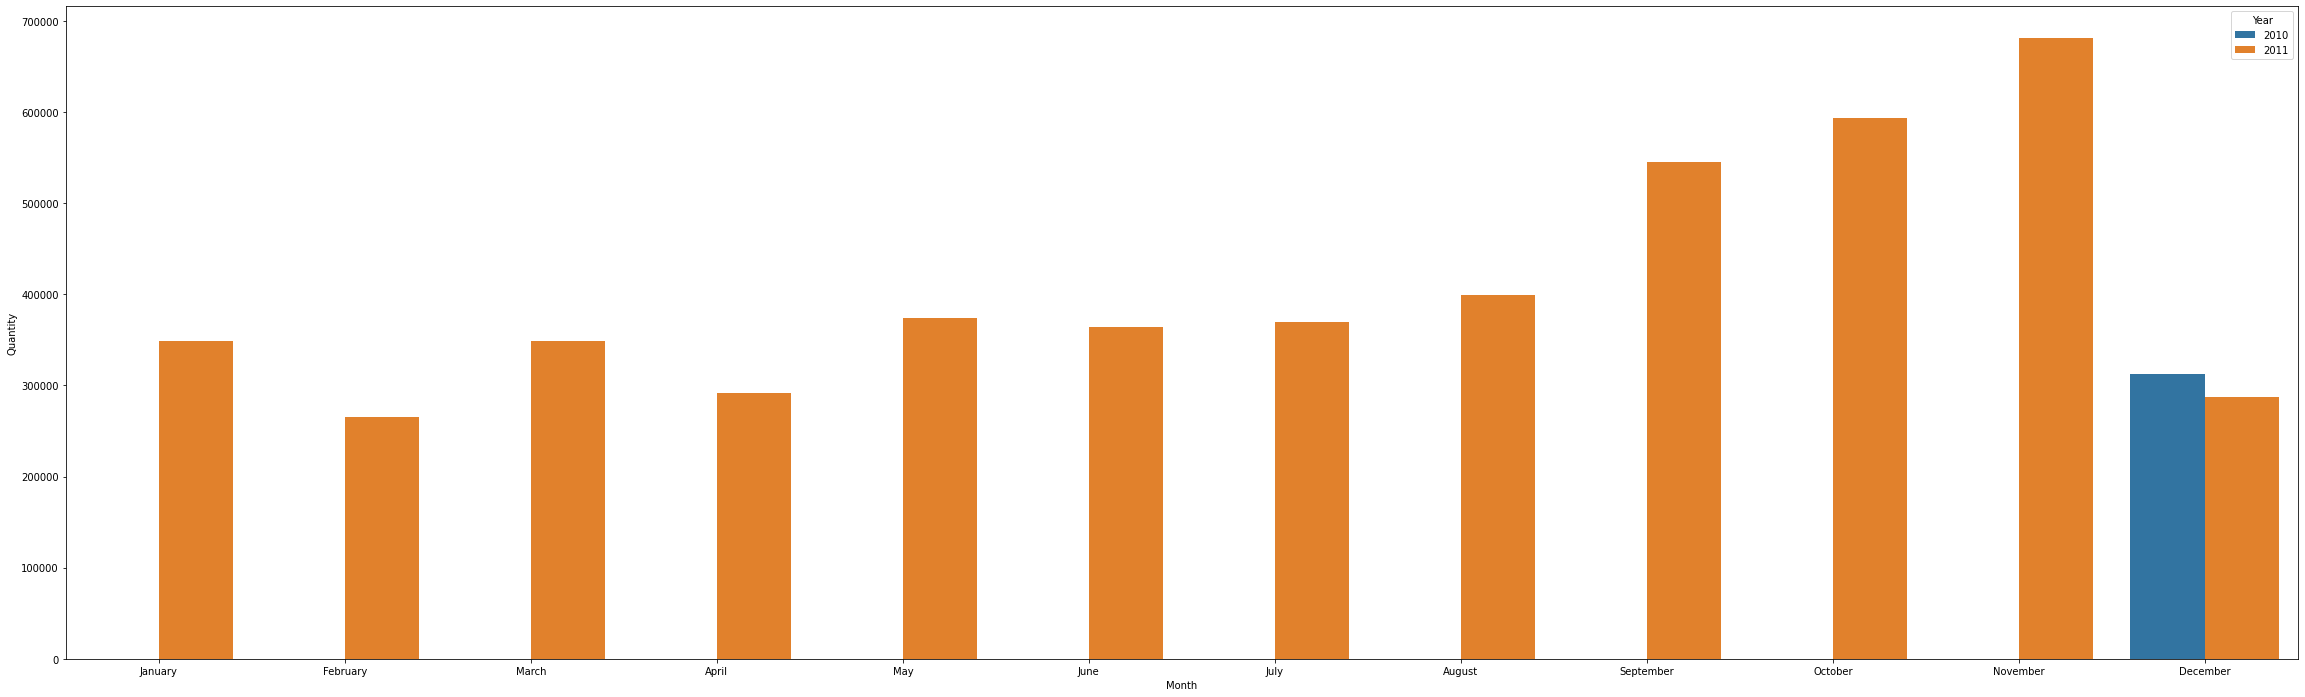

In [19]:
#df_wide = df.pivot_table(index="Year", columns="Month", values="Quantity",aggfunc = 'sum')
fig, ax = plt.subplots(figsize = (40,12))
sns.barplot(x =df_1['Month'], y= df_1['Quantity'],hue = df_1['Year'], estimator ='sum',errorbar = None,ax = ax)
plt.show()

**In november followed by october and september month we can see more products are sold**

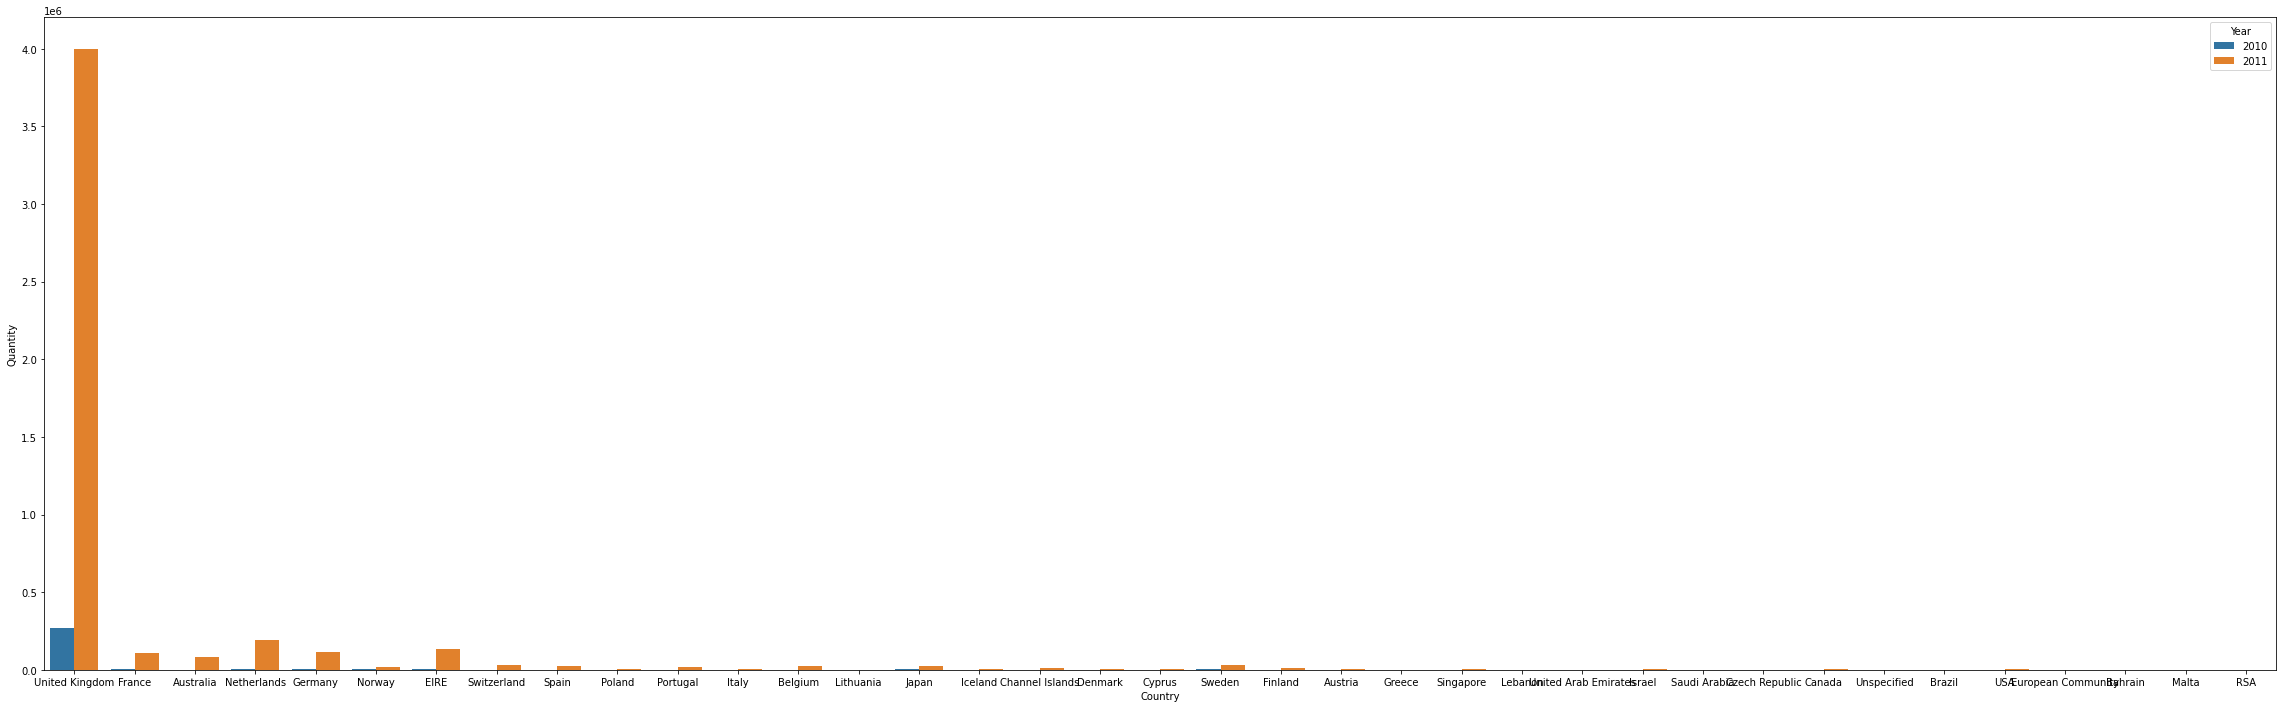

In [20]:
fig, ax = plt.subplots(figsize = (40,12))
sns.barplot(x = df_1['Country'], y = df_1['Quantity'], hue = df_1['Year'], estimator = 'sum', errorbar = None)
plt.show()

**From United Kingdom more customers are purchasing products followed by Netherlands, Ireland, Germany, France and Australia. Very Less customers from saudi Arabia purchased products from online retail.**

<AxesSubplot:xlabel='UnitPrice', ylabel='Quantity'>

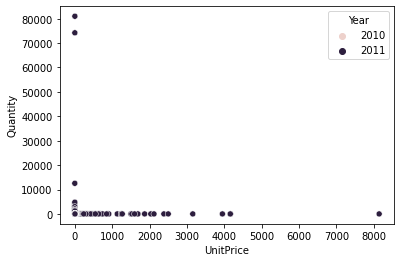

In [21]:
sns.scatterplot(x = df_1['UnitPrice'], y= df_1['Quantity'], hue = df_1['Year'])

**Less unit price more selling of products.**

In [22]:
# number of customers from each country
data_customers = df_1[['CustomerID', 'Country']].groupby('Country').agg('count')
data_customers.head()

,CustomerID
Country,
Australia,1185
Austria,398
Bahrain,17
Belgium,2031
Brazil,32


In [23]:
data_customers = data_customers.reset_index()

In [24]:
data_customers[data_customers['CustomerID']==data_customers['CustomerID'].min()]

,Country,CustomerID
28,Saudi Arabia,9


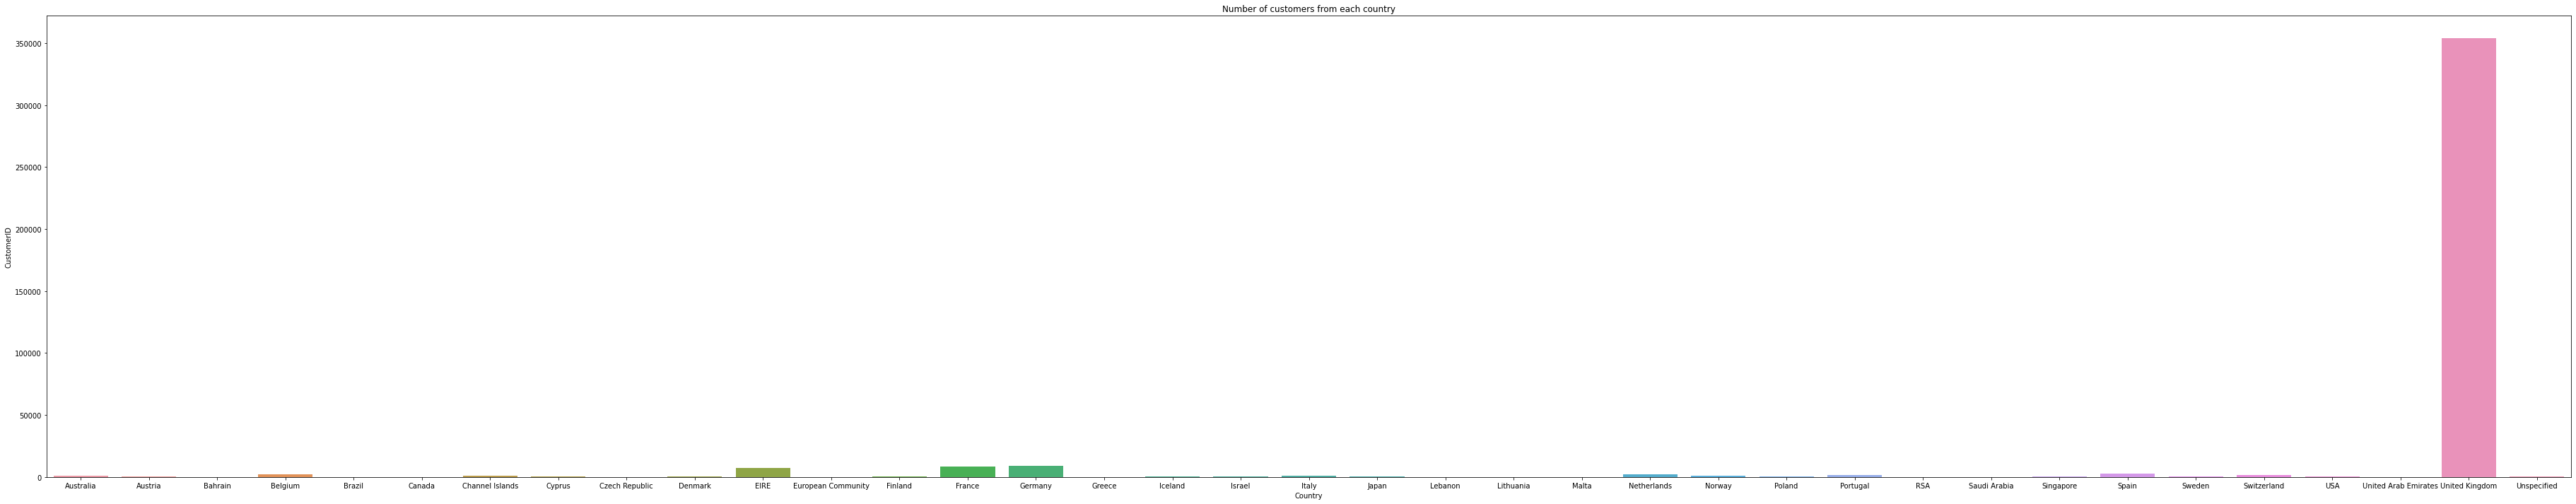

In [25]:
fig,ax = plt.subplots(figsize = (64,12))
sns.barplot(x = data_customers['Country'], y = data_customers['CustomerID'], ax = ax)
plt.title('Number of customers from each country')
plt.show()

**The maximum number of customers are from united kingdom and very less around 10 customers are from saudi Arabia**

In [26]:
# Maximum sales on which day of week and Month
data_desc = df_1[['Description','Quantity','Month','Year','Weekday']].groupby(['Year','Month','Weekday']).agg({'Quantity':'sum'})
data_desc.dropna(inplace = True)
data_desc.head()

Quantity
Year Month    Weekday           
2010 December Friday     39297.0
              Monday     45071.0
              Sunday     30788.0
              Thursday   81576.0
              Tuesday    48258.0

In [27]:
data_desc = data_desc.reset_index()

In [28]:
#data_desc['Quantity'].nlargest(5)

In [29]:
data_desc.sort_values('Quantity', ascending = False, ignore_index = True).head(10)

,Year,Month,Weekday,Quantity
0,2011,November,Wednesday,155711.0
1,2011,September,Thursday,131354.0
2,2011,January,Tuesday,128179.0
3,2011,October,Thursday,125933.0
4,2011,November,Thursday,125166.0
5,2011,August,Thursday,124059.0
6,2011,November,Tuesday,122781.0
7,2011,October,Monday,118891.0
8,2011,December,Friday,116213.0
9,2011,September,Tuesday,111676.0


**In 2011 on wednesdays of november we can see more sales of the products and also on Thursdays and Tuesdays of other months their are more sales.**

<AxesSubplot:xlabel='Month', ylabel='Quantity'>

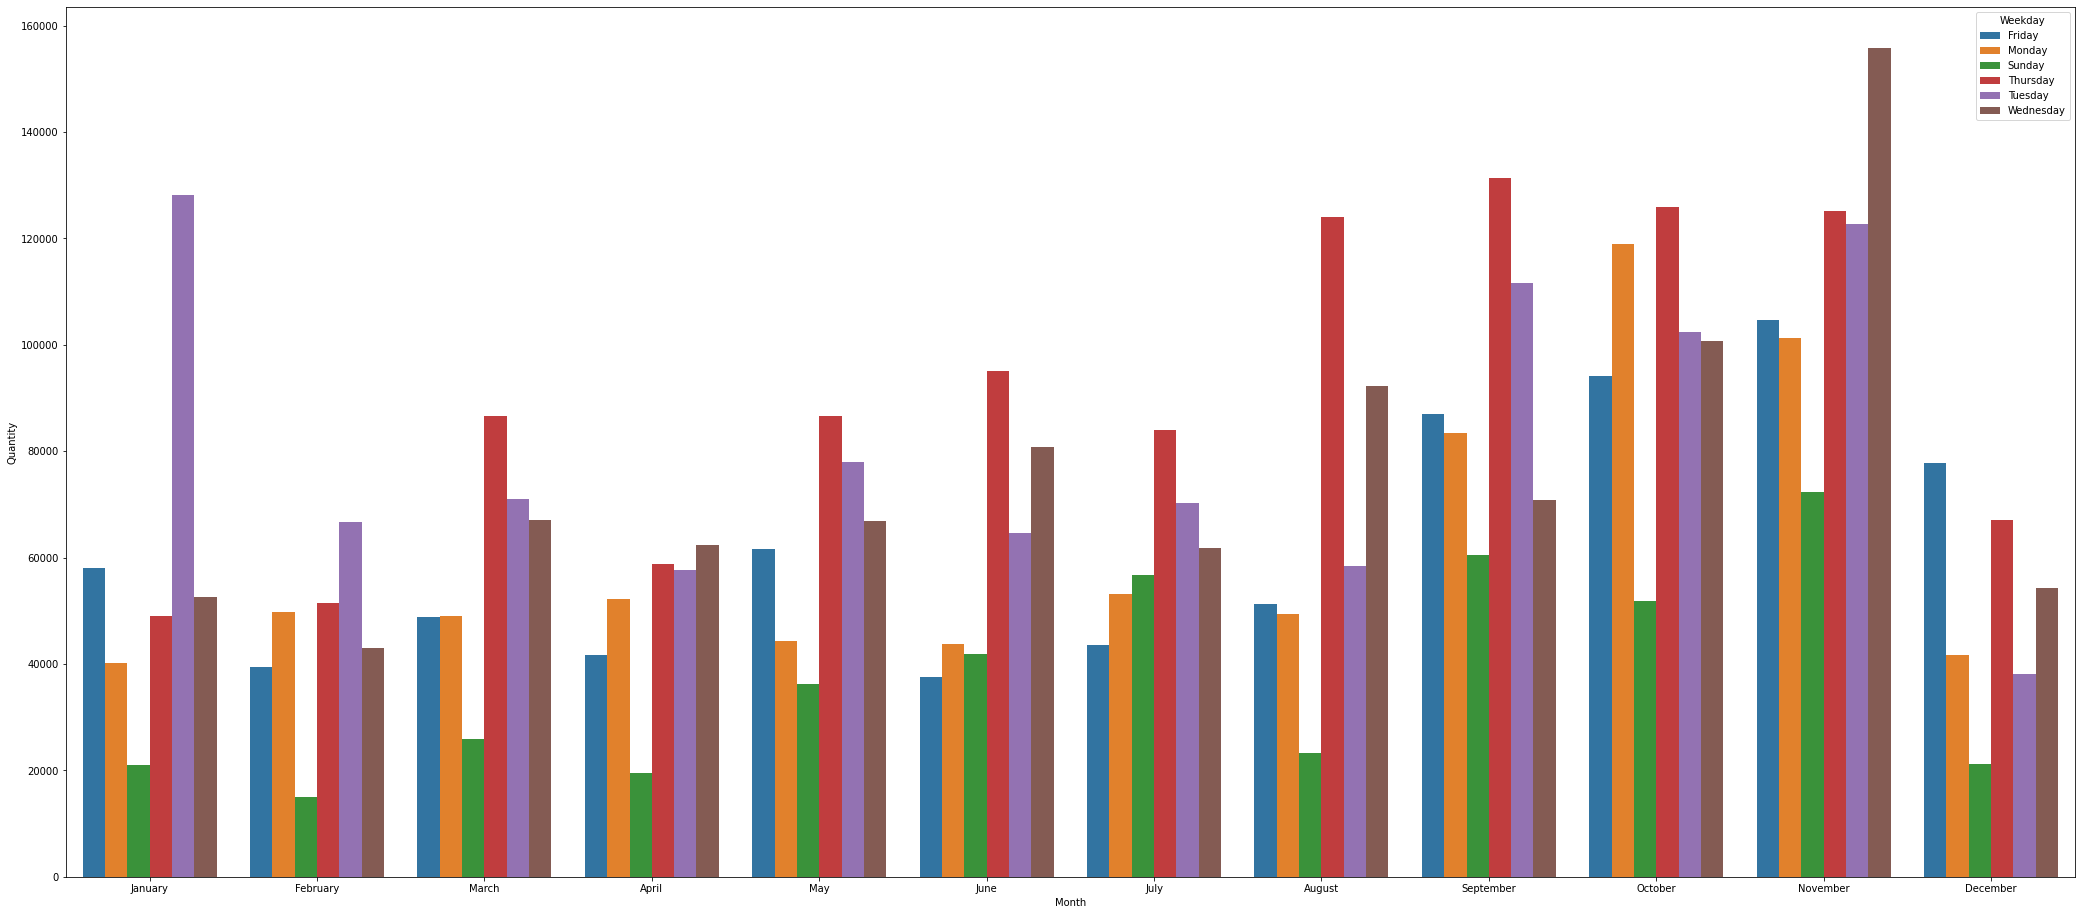

In [30]:
#data_desc = data_desc.reset_index()
fig, ax = plt.subplots(figsize = (36,16))
sns.barplot(x = data_desc['Month'],y = data_desc['Quantity'], hue = data_desc['Weekday'], errorbar = None)

In [31]:
# sales of products in different months across various country 
gt = df_1[['Description','Quantity','Month','UnitPrice','Country']].groupby(['Country','Description','Month']).agg({'Quantity':'sum','UnitPrice':'mean'})
gt.sort_values(by='Quantity', ascending = False).head(10)

Quantity  UnitPrice
Country        Description                       Month                        
United Kingdom PAPER CRAFT , LITTLE BIRDIE       December   80995.0   2.080000
               MEDIUM CERAMIC TOP STORAGE JAR    January    74215.0   1.040000
               ASSTD DESIGN 3D PAPER STICKERS    November   12551.0   0.680000
               WORLD WAR 2 GLIDERS ASSTD DESIGNS April       9552.0   0.274000
                                                 October     8078.0   0.310364
               POPCORN HOLDER                    November    8036.0   0.843434
               SMALL POPCORN HOLDER              May         6618.0   0.834189
               ASSORTED COLOUR BIRD ORNAMENT     August      6369.0   1.668614
               RABBIT NIGHT LIGHT                November    6179.0   2.036333
               WORLD WAR 2 GLIDERS ASSTD DESIGNS December    5830.0   0.291489

In [32]:
data_sales = df_1[['Description','Country','Quantity']].groupby(['Country','Description']).agg('sum')
data_sales.head()

Quantity
Country   Description                            
Australia  DOLLY GIRL BEAKER                  200
           I LOVE LONDON MINI BACKPACK          4
          10 COLOUR SPACEBOY PEN               48
          12 PENCIL SMALL TUBE WOODLAND       384
          12 PENCILS TALL TUBE POSY           252

In [33]:
data_sales.sort_values(by='Quantity',ascending = False).head(10)

Quantity
Country        Description                                 
United Kingdom PAPER CRAFT , LITTLE BIRDIE            80995
               MEDIUM CERAMIC TOP STORAGE JAR         76919
               WORLD WAR 2 GLIDERS ASSTD DESIGNS      49182
               JUMBO BAG RED RETROSPOT                41981
               WHITE HANGING HEART T-LIGHT HOLDER     34648
               ASSORTED COLOUR BIRD ORNAMENT          32727
               POPCORN HOLDER                         28935
               PACK OF 12 LONDON TISSUES              24337
               BROCADE RING PURSE                     22711
               PACK OF 72 RETROSPOT CAKE CASES        22465

**We can observe maximum sales of these products Paper Craft, Little Birdie, medium ceramic top storage jar, world war 2 gliders asstd designs are from united kingdom.**

<AxesSubplot:xlabel='Quantity'>

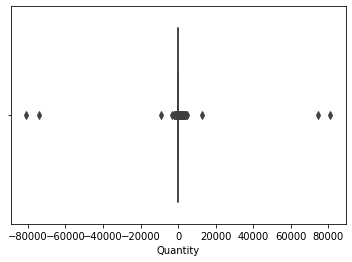

In [34]:
# find outliers
sns.boxplot(x = df['Quantity'])

<AxesSubplot:xlabel='UnitPrice'>

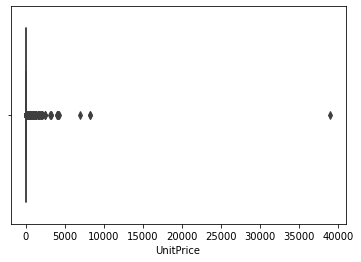

In [35]:
sns.boxplot(x = df['UnitPrice'])

**Outliers are present in the Quantity variable and Unit Price variable in the online retail dataset.These outliers affects our analysis in several ways. They can skew the data and affects the mean and standard deviation making it difficult to obtain accurate estimates. Outliers also affects the regression line and leads to incorrect predictions. Therefore, it is crucial to identify and exclude outliers before conducting any analysis.**

# Summary #

- During weekends, customers purchasing products from online is very less. Conduct further investigation regarding why customers   are not interested on online shopping during weekends 
- Cost price of particular products are also affecting the sales. For lesser prices more products are sold
- Customers from Arab countries like Saudi Arabia, United Arab Emirates and Bahrain and also Asian countries like singapore,     
  labanon, cyprus, israel are unlikely to purchase from online. May be   the products options are not of their choice. More  
  products are to be added according to the customer preferences
- Maximum customers purchased products in online are from Western European Countries like United Kingdom, France, Netherlands

